## Iffat Chowdhury
## MTH 337 
## Instructor - Richard Hollister

# Project 5 Epidemic

# Introduction

An epidemic occurs when there is an infectious disease that is spreading within a closed environment such as a city or a country. COVID-19 was considered to be an epidemic when it was confined within China. However, COVID-19 is no longer considered to be an epidemic rather it is now a pandemic because it has spread worldwide. (1) 

In this project, we will be taking a look at how epidemics function. We are specifically testing how an epidemic is impacted by different probabilities of getting the infection, probabilities of recovering after getting the infection, and the probabilities of getting vaccinated. 

Changes occurring during an epidemic will put under a combination of restrictions based on the probabilities of infection, recovering, and getting vaccinated will be animated in a 200 by 200 grid that will have to change frames to demonstrate how the three variables are impacting the sample size. Within the 200 by 200 grid there are exactly 40000 cells which will be the sample size used within the project. At any time in the animation, each of the cells will either be healthy, sick, healed, or vaccinated.

Healthy cells will be **green**, sick cells will be **black**, cells that have healed will be **orange**, and vaccinated cells will be **blue**. 

Healthy cells will be associated with a value of $0$. Sick cells will be associated with a value of $1$. Healed cells will be associated with a value of $2$. Vaccinated cells will be associated with a value of $-1$.

I will make various simulations of epidemics put under various restrictions to analyze how epidemics function under specific characteristics.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
from matplotlib.animation import FuncAnimation
from matplotlib import colors

In [12]:
def create_grid(n = 200): # by default the function will make a 200 by 200 grid
    x = np.zeros((n,n))
    lower_bound = int((n-4)/2)
    upper_bound = int(lower_bound + 4)
    x[lower_bound:upper_bound, lower_bound:upper_bound] = np.ones((4,4)) #this will create the the 16 sick cell at the center of the grid
    return x

To create an epidemic model we need a function that will make the grid contain all of the cells. The function $create$_$grid(n = 200)$ will create a 200 by 200 graph by default when called without any inputs. It will also create a 4 by 4 square located at the center of the grid, the 16 cell that makes up this small square will be cells that are sick. The sickness will spread from the center outwards. 

The 200 by 200 grid will have a sample size of exactly 40000. In the first frame, there will be 16 sick (black) cells located in the center and the rest of the cell will be healthy (green) cells.

This function will be the foundation for the epidemic model that will be created, the next functions will build on top of this frame.

In [16]:
def cell_is_sick(x, pi, n = 200): # x compiling grid, pi - probability of becoming sick
    grid_sick = np.zeros((n,n))     # new grid 200 by 200
    for a, b in [(a,b) for a in range(n) for b in range(n)]: # represents the 40000 cells
        ran =rn.random()                 # random value between 0 and 1
        if x[a,b] == 0:                  
            count = 0 
            if a >0:                     # accounts for cells that are not completely surround by cells                   
                if x[a-1,b] == 1:        # cell to the left of current (a,b) cell
                    count += 1
                if b >0 and x[a-1,b-1] == 1: # bottom left cell of current (a,b) cell
                    count += 1      
            if a < n-1:
                if x[a+1, b] == 1:      # cell to the right of current (a,b) cell
                    count += 1
                if b<n-1 and x[a+1, b+1] == 1: # upper right cell of current (a,b) cell
                    count += 1              
            if b>0:
                if x[a,b-1] == 1:          # cell beneath current (a,b) cell
                    count += 1
                if a <n-1 and x[a+1,b-1] == 1: # bottom right cell of current (a,b) cell
                    count += 1                
            if b < n-1:
                if x[a, b+1] == 1:        # above current current (a,b) cell
                    count += 1
                if a > 0 and x[a-1,b+1] == 1:  # upper left cell of current (a,b) cell
                    count += 1   
        if ran < 1 - ((1-pi)** count):        
            grid_sick[a,b] = 1              # cell only gets sick if this step is reached
    return grid_sick + x                  # combines the two grids

The function $cell$_$is$_$sick(x, pi, n = 200)$ will change healthy cells into sick ones, this will be represented in the grid when in one frame a cell is green and then in the next frame the cell is black.

The $cell$_$is$_$sick(x, pi, n = 200)$ function will only test cells that are healthy. This makes sense because a cell that is already sick can't become even more sicker based on this model. Also, cells that have recovered can't become sick again so they are also excluded from being able to catch the sickness. Likewise, the function will not change cells that have been vaccinated.

The probability that a healthy cell becomes sick directly depends on the value of the $pi$ inputted into the function. $pi$ represents the probability of infection happening to a cell. It also depends on the number of sick cells that surround a healthy cell. This is similar to how people get sick, if a healthy person is around individuals that are sick it increases the likelihood that the person catches a specific illness, compared to someone who is not surrounded by sick people.

The probability of becoming infected when a cell is healthy (non-recovered and non-vaccinated cells) can be represented through the following function:

$$1−(1−p_I)^k $$

Where $p_I$ is the probability of becoming infected and k is the number of sick cells that are surrounding the healthy orange cells.

Most cells within the 200 by 200 grid have 8 other cells that surround it, but this does not hold for all of the cells. Cells that are at the border of the grid will have less than eight cells surrounding it. Cells that are at the edges of the grid will have 3 cells surrounding them and the other boundary cells will have five cells surrounding them. The function $cell$_$is$_$sick(x, pi, n = 200)$ will account for this.

In [17]:
def units_that_recovered(x, pr, n = 200): # x compiling grid, pr - probability of recovering
    for a, b in [(a,b) for a in range(n) for b in range(n)]:
        ran = rn.random()
        if pr >= ran and x[a, b] == 1: # if random value is less then probability of recovering cell will recover
            x[a, b] = 2
    return x                   # changes made to the compiled grid

After a cell goes from being healthy to becoming sick it then has the possibility of recovering from the infection. The function $units$_$that$_$recovered(x, pr, n = 200)$ specifically changes only sick cells into recovered ones if the input $pr$ is greater than or equal to the random number generated. After this function is run sick cells have the possibility of recovering, meaning that black cells become orange ones. After a cell recovers from the infection, it can no longer get it anymore, so orange cells stay orange throughout the whole animation unless they get vaccinated, then they will turn into blue cells.

## Part 1 & 2

The first part of the project assignments asks to create a function *epidemics* that creates a 200 by 200 grid that has a 16 by 16 block of sick cells at the center of the grid and that the function shows what happens to the cells as the days pass.

In the second step, it asks to change the code that is provided to users so that it shows an epidemic model.

These two steps go well together because the function *epidemics* could be implemented into the animation code that is provided in the second step.

<IPython.core.display.Javascript object>


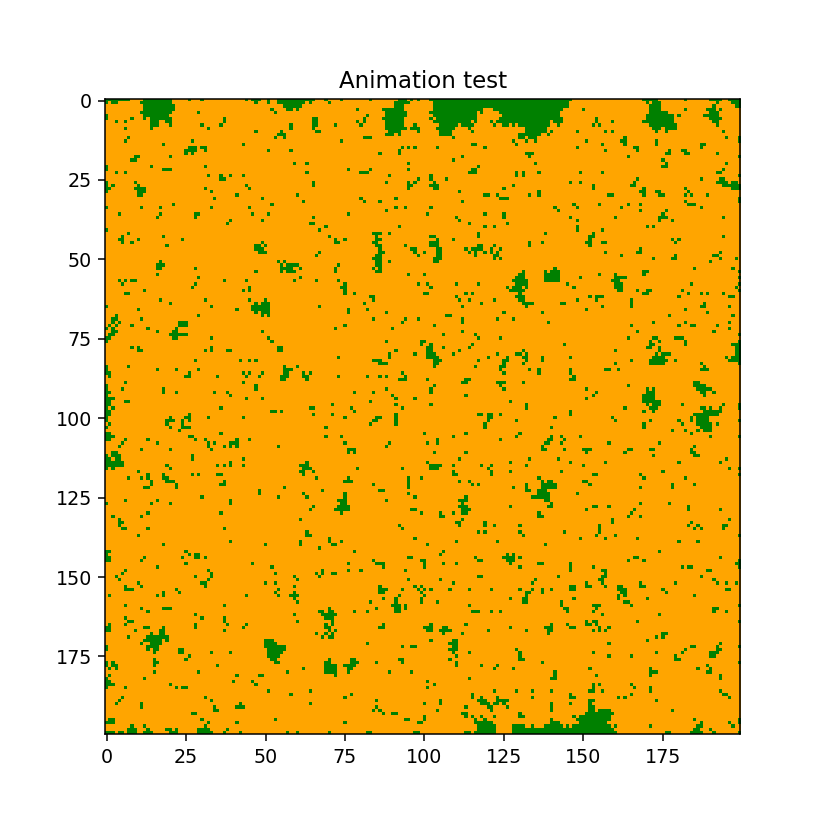

In [18]:
%matplotlib notebook
x = create_grid()  # the foundation, everything will build onto the x grid

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) # I had to change the positions of orange and black to match the value given to the colors
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def epidemics(i, pi=0.5, pr =0.3 ):       # function contains infection probability and recovery probability 
    global x
    
    recovered = units_that_recovered(x,pr) # accounts for recovery
    sick = cell_is_sick(x, pi)           # accounts for cells that are becoming sick
    x =  sick + recovered                 # cells first become sick and then they may be able to recover
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics, frames = 500, interval=100,  repeat=False)
plt.show()

**Important** - Sometimes when it is the first time running the animation above it does not work, so you have to run it again and it always works after that. This is only true for the first aniation and should not be an issue for the other ones.

The function $epidemics(i, pi=0.5, pr =0.3 )$ replaced the $animate(i)$ function that was provided in the code in part two of the project assignment.

The $epidemics(i, pi=0.5, pr =0.3 )$ has inputs: $i$ that represents frames of animation, $pi$ that represents the infection probability and $pr$ stands for the recovery probability.

The $create$_$grid()$ function makes the 200 by 200 grid that has 16 by 16 sick cells at the center of the grid. Cells becoming sick is expressed through the use of the function $cell$_$is$_$sick(x, pi, n = 200)$ and sick cells that have recovered is done through the use of the function $units$_$that$_$recovered(x, pr, n = 200)$. This all comes together to create an animation of the evolving epidemic.

## Part 3  

As the infection probability gets smaller and the recovery probability is kept the same and is not too high or too low let's say $p_r = 0.5$. Then the spread of the infection is contained more as the infection probability decreases.

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


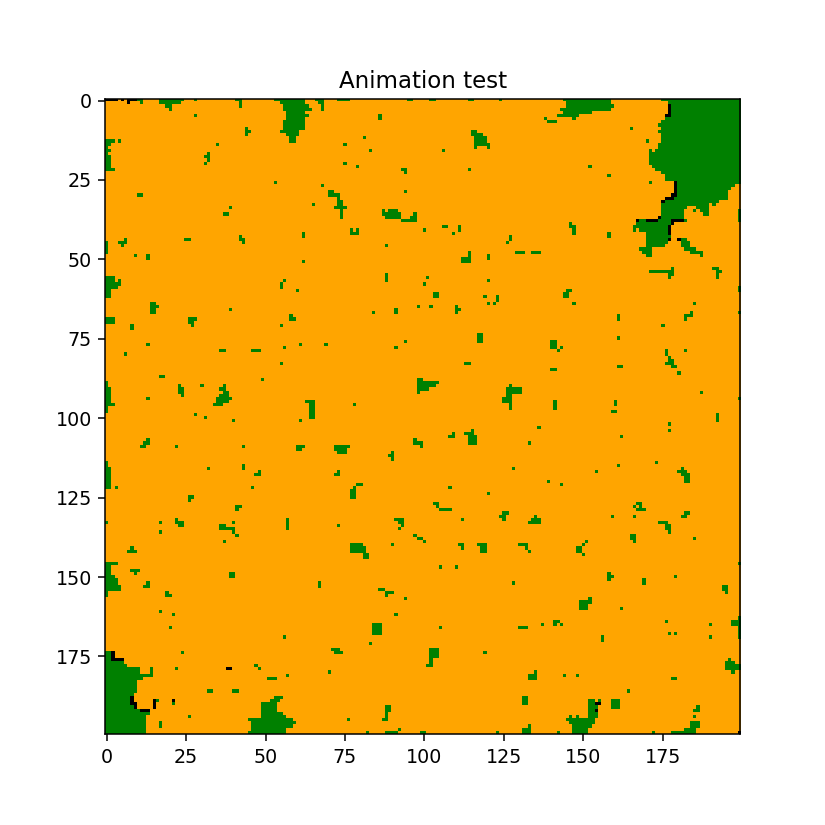

In [19]:
%matplotlib notebook
x = create_grid()  # the foundation, everything will build onto the x grid

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) # I had to change the positions of orange and black to match the value given to the colors
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def epidemics(i, pi=0.9, pr =0.5 ):       # function contains infection probability and recovery probability 
    global x
    
    recovered = units_that_recovered(x,pr) # accounts for recovery
    sick = cell_is_sick(x, pi)           # accounts for cells that are becoming sick
    x =  sick + recovered                 # cells first become sick and then they may be able to recover
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics, frames = 500, interval=100,  repeat=False)
plt.show()

The initial reason why I made this animation was to compare how a large value for the probability of infection ($p_i$) compares to when $p_i$ is a low value. The animation above has $p_i$ as being equal to 0.9 and $p_r$ the probability of recovery of a sick cell is equal to 0.5. I was expecting to see the majority of the cells get sick but I did not expect there to be as many cells that have not gotten sick. The reason for this may be caused by cells healing around one or a group of healthy cells preventing them from catching the infection. 

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


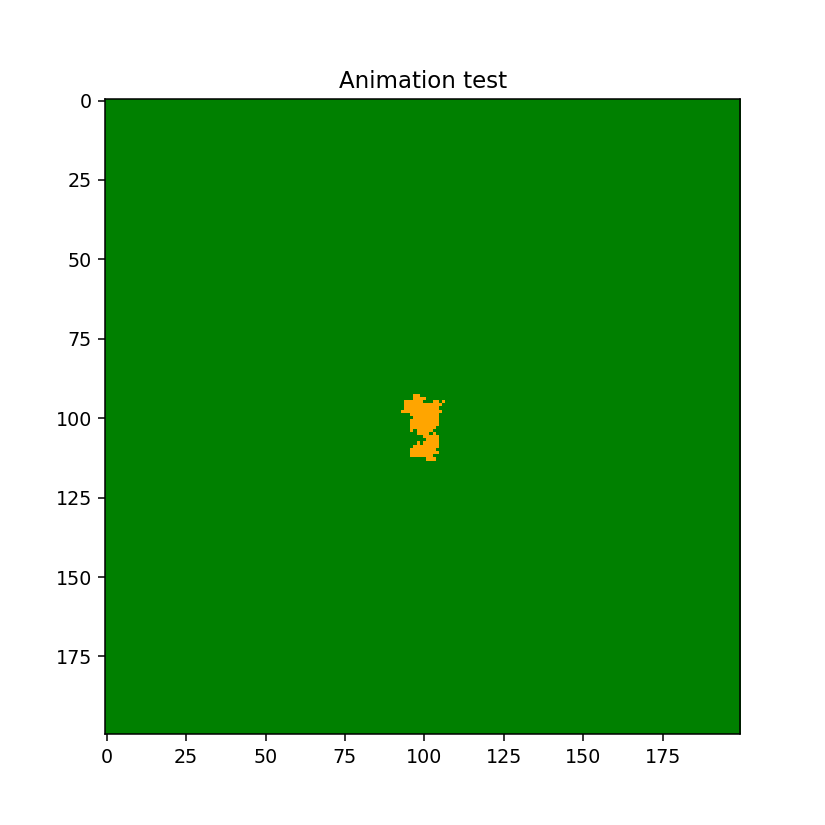

In [20]:
%matplotlib notebook
x = create_grid()  # the foundation, everything will build onto the x grid

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) # I had to change the positions of orange and black to match the value given to the colors
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def epidemics(i, pi=0.6, pr =0.5 ):       # function contains infection probability and recovery probability 
    global x
    
    recovered = units_that_recovered(x,pr) # accounts for recovery
    sick = cell_is_sick(x, pi)           # accounts for cells that are becoming sick
    x =  sick + recovered                 # cells first become sick and then they may be able to recover
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics, frames = 500, interval=100,  repeat=False)
plt.show()

There is a drastic change from the animation above this one compared to this animation. The only thing that was changed was the $p_i$ value that was inputted, it changed from being 0.9 to 0.6, and $p_r$ remained at 0.5. As the value of $p_i$ gets closer to the value of $p_r$ the infection is unable to spread quickly enough. 

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


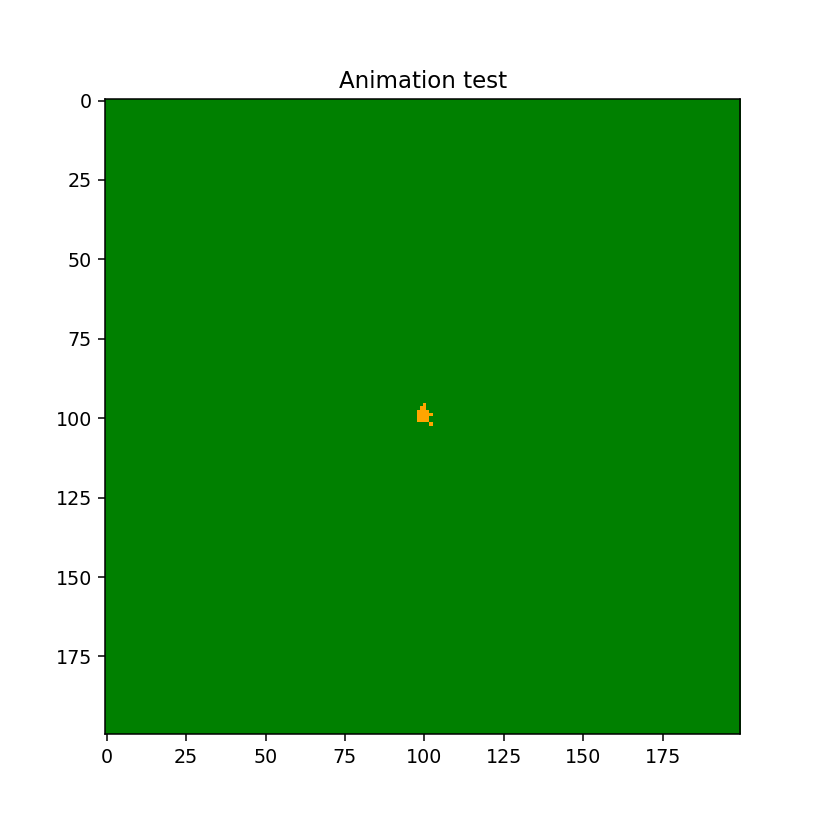

In [21]:
%matplotlib notebook
x = create_grid()  # the foundation, everything will build onto the x grid

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) # I had to change the positions of orange and black to match the value given to the colors
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def epidemics(i, pi=0.1, pr =0.5 ):       # function contains infection probability and recovery probability 
    global x
    
    recovered = units_that_recovered(x,pr) # accounts for recovery
    sick = cell_is_sick(x, pi)           # accounts for cells that are becoming sick
    x =  sick + recovered                 # cells first become sick and then they may be able to recover
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics, frames = 500, interval=100,  repeat=False)
plt.show()

When the value of $p_i$ gets too low and $p_r$ is kept the same then the infection barely spreads, before it can spread too far from the initial 4 by 4 sick block, those cells along with few new sick cells recover within a few frames. This will end the spread of the infection altogether.

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


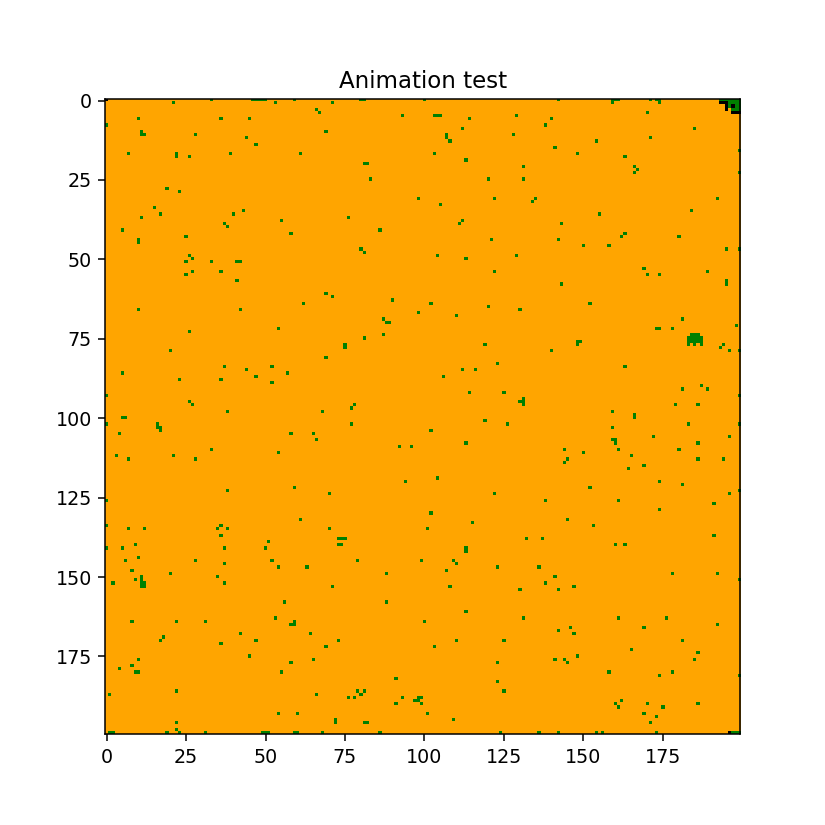

In [22]:
%matplotlib notebook
x = create_grid()  # the foundation, everything will build onto the x grid

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) # I had to change the positions of orange and black to match the value given to the colors
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def epidemics(i, pi=0.5, pr =0.1 ):       # function contains infection probability and recovery probability 
    global x
    
    recovered = units_that_recovered(x,pr) # accounts for recovery
    sick = cell_is_sick(x, pi)           # accounts for cells that are becoming sick
    x =  sick + recovered                 # cells first become sick and then they may be able to recover
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics, frames = 500, interval=100,  repeat=False)
plt.show()

If $p_r$ is a low value meaning that it is closer to zero than to one and the $p_i$ value is kept the same at 0.5, then the infection spreads to most of the 40000 cells and only a few cells don't catch the infection.

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


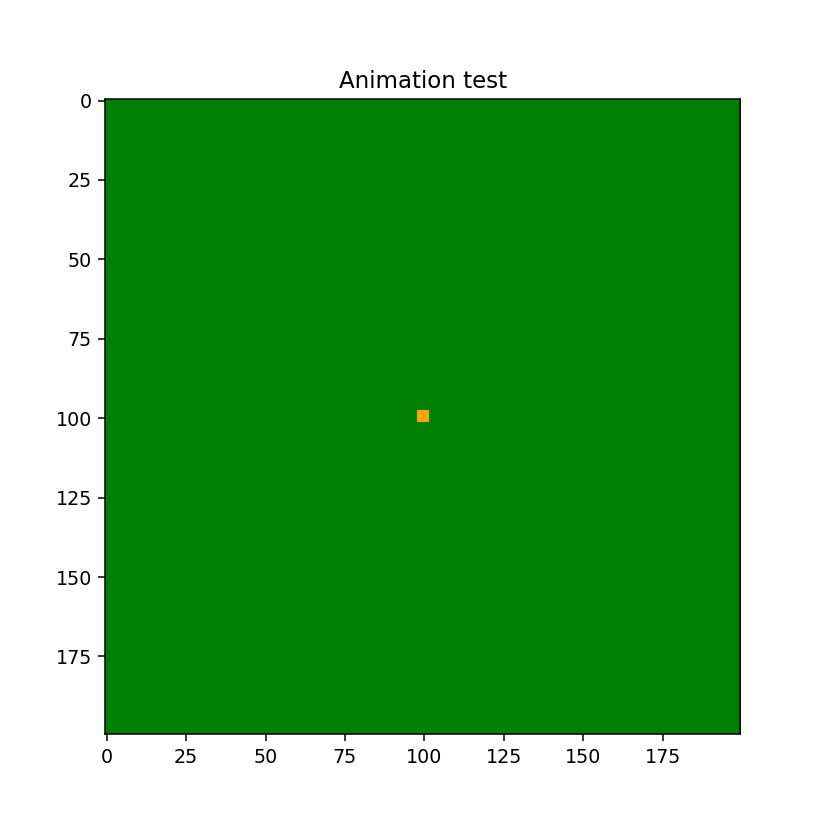

In [23]:
%matplotlib notebook
x = create_grid()  # the foundation, everything will build onto the x grid

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) # I had to change the positions of orange and black to match the value given to the colors
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def epidemics(i, pi=0.5, pr =0.9 ):       # function contains infection probability and recovery probability 
    global x
    
    recovered = units_that_recovered(x,pr) # accounts for recovery
    sick = cell_is_sick(x, pi)           # accounts for cells that are becoming sick
    x =  sick + recovered                 # cells first become sick and then they may be able to recover
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics, frames = 500, interval=100,  repeat=False)
plt.show()

If the $p_r$ value is high and the $p_i$ value is kept at 0.5, more times then not the infection is not able to spread to any other new cells, because the initial 16 sick cells recover within the first few frames. Which will thereby end the spread of the infection.

## Part 4

Part four of the project assignment asks to create an animation that includes a new variable which would the probability of getting vaccinated. All cells no matter if they are sick, healthy, or even if they recovered from the infection can get the vaccination. However, if a cell already got vaccinated it would not get vaccinated again. Vaccination comes in handy when sick and healthy cells receive it. Sick cells go from being sick black cells to being healthy vaccinated blue cells and healthy cells that get vaccinated will never catch the infection. Whereas for cells that have recovered from the infection, if they get the vaccination, under the conditions of how the infection functions a recovered cell can not get infected again so receiving the vaccination does not change anything other than the color of the cells.

In [24]:
def vaccinated(x, pv,  n = 200):
    grid_vaccine = np.zeros((n,n))
    for a, b in [(a,b) for a in range(n) for b in range(n)]:
        if grid_vaccine[a,b] == 1 or grid_vaccine[a,b] == 0 or grid_vaccine[a,b] == 2: # only non-vaccinated cells can get vaccinated
            ran = rn.random()
            if pv > ran:
                grid_vaccine[a,b] = -1  # non-vaccinated cell is now vaccinated
    return grid_vaccine + x        # put together with the other components

The function $vaccinated(x, pv,  n = 200)$ is only able to change non-vaccinated cells into vaccinated cells depending on the probability of getting vaccinated which I denoted as $p_v$ from now on.

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


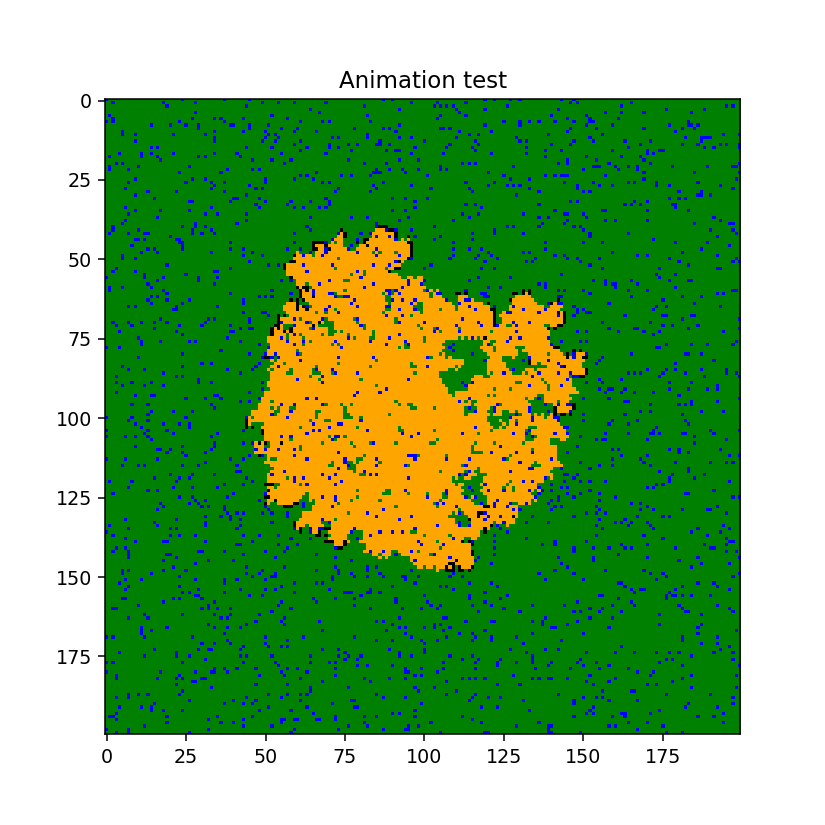

In [25]:
%matplotlib notebook
x = create_grid()

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['blue', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def epidemics_with_vaccine(i, pi=0.5, pr = 0.3, pv = 0.001):
    global x
    vaccination = vaccinated(x, pv)
    recovered = units_that_recovered(x,pr)
    sick = cell_is_sick(x, pi)
    x =  sick + recovered + vaccination
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics_with_vaccine, frames = 500, interval=100,  repeat=False)
plt.show()

There are large amounts of areas on the sides of the grid where cells are either healthy (green cells) or they have vaccinated cells (blue cells) that have never been sick.

When vaccinations are put into the model cells that are farther away from the center of the grid, which is where the infection starts, have a higher chance of not getting an infection because they have more of a probability of getting vaccinated before the infection reaches them. Additionally, the addition of vaccines slows down the spread of the infection because in each frame more cells are becoming cured. 

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


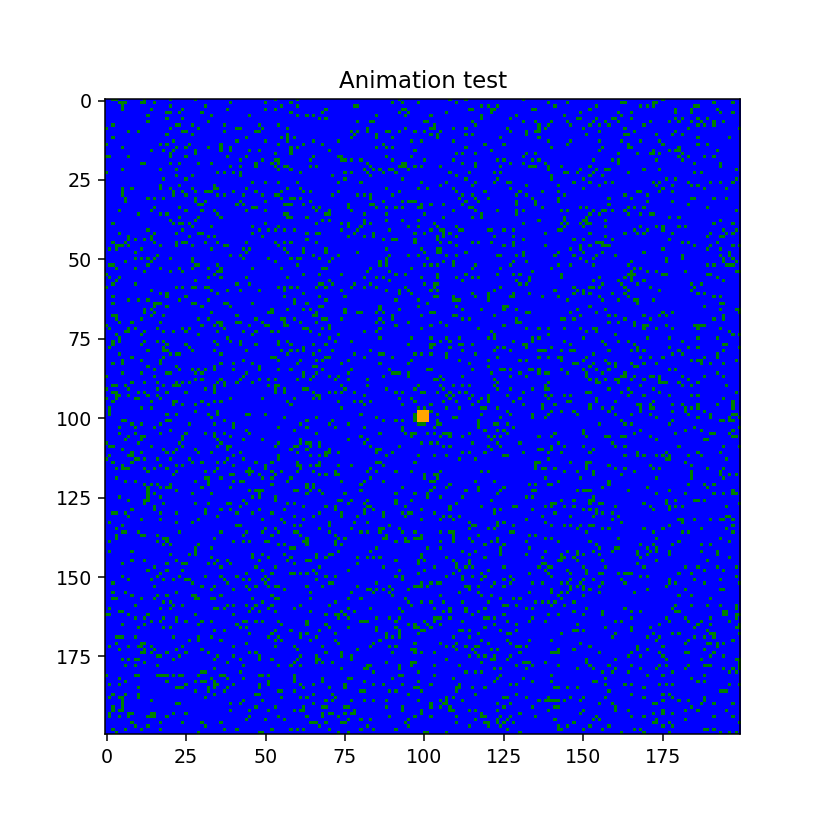

In [26]:
%matplotlib notebook
x = create_grid()

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['blue', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def epidemics_with_vaccine(i, pi=0.5, pr = 0.3, pv = 0.9):
    global x
    vaccination = vaccinated(x, pv)
    recovered = units_that_recovered(x,pr)
    sick = cell_is_sick(x, pi)
    x =  sick + recovered + vaccination
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics_with_vaccine, frames = 500, interval=100,  repeat=False)
plt.show()

This animation is a bit unrealistic but if the vaccine was widely available and easily obtained at the start of the infection appearance then the infection does not spread because all most all of the healthy cells become vaccinated quickly and the infection is stopped almost right away.

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


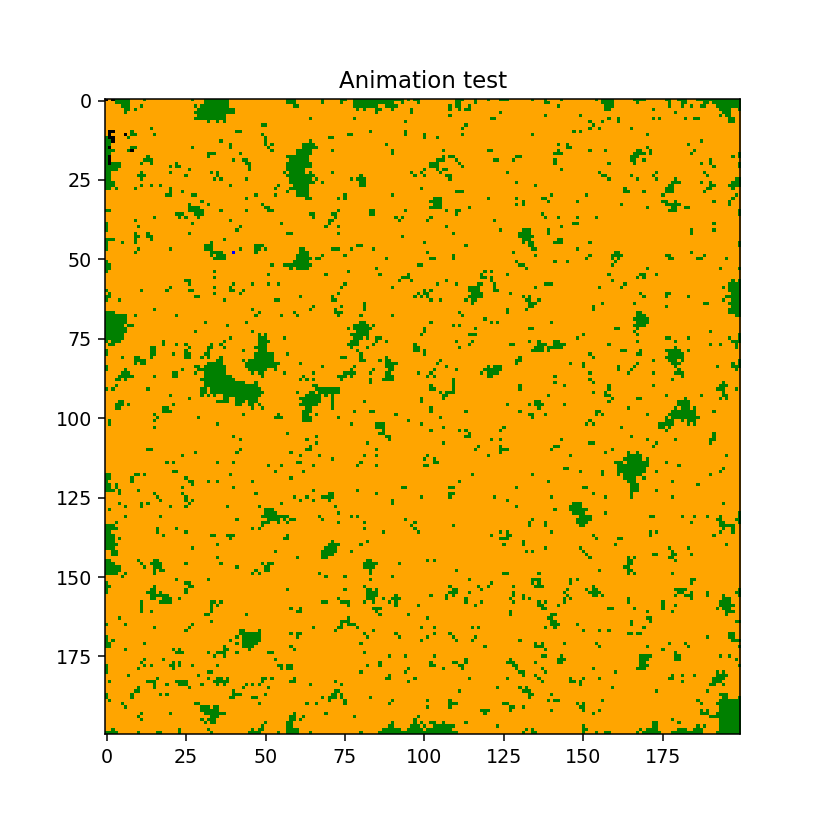

In [27]:
%matplotlib notebook
x = create_grid()

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['blue', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def epidemics_with_vaccine(i, pi=0.5, pr = 0.3, pv = 0.000001):
    global x
    vaccination = vaccinated(x, pv)
    recovered = units_that_recovered(x,pr)
    sick = cell_is_sick(x, pi)
    x =  sick + recovered + vaccination
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics_with_vaccine, frames = 500, interval=100,  repeat=False)
plt.show()

If the probability of getting vaccinated is too low, $p_v$ has a value of 0.000001 in the animation above, it does little to nothing to stop the spread of the infection. Only a handful of cells get vaccinated and it does not make any notable impacts on the spread of the infection.

Traceback (most recent call last):
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\iffat\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


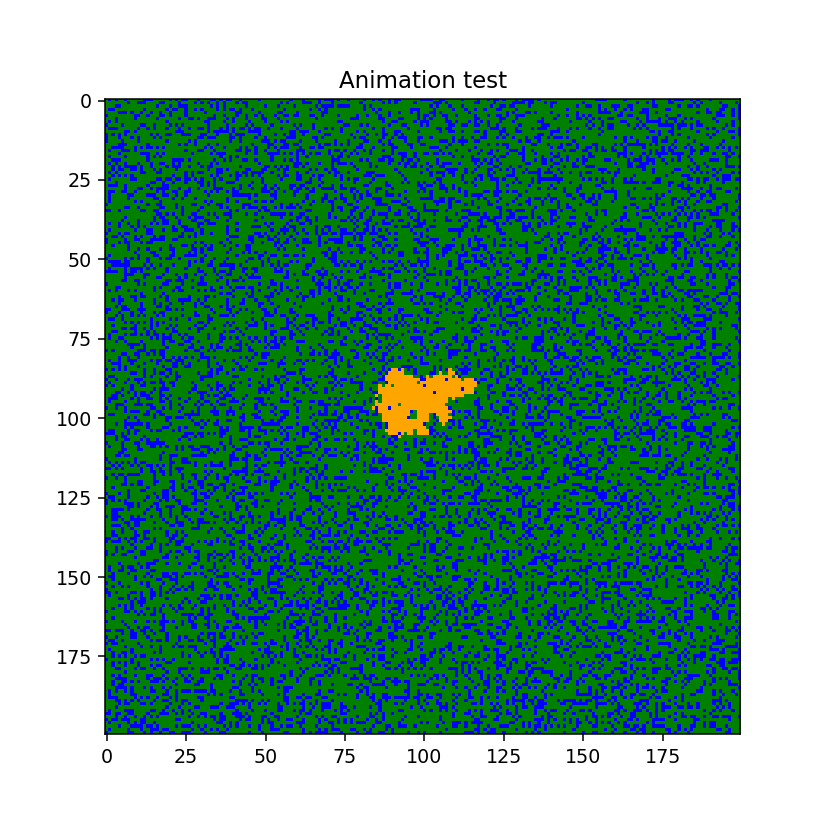

In [28]:
%matplotlib notebook
x = create_grid()

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['blue', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def epidemics_with_vaccine(i, pi=0.5, pr = 0.4, pv = 0.001):
    global x
    vaccination = vaccinated(x, pv)
    recovered = units_that_recovered(x,pr)
    sick = cell_is_sick(x, pi)
    x =  sick + recovered + vaccination
    
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=epidemics_with_vaccine, frames = 500, interval=100,  repeat=False)
plt.show()

The probabilities of getting vaccinated or recovering from the infection are both important when it comes to slowing down and even stopping the spread of the infection. As the values of $p_r$ and $p_v$ increase, the spread of the infection is slowed down and in some cases, it is completely stopped.

## Conclusion

The Epidemic project explained how infections spread what are the best ways of preventing an epidemic. This was expressed through the use of various models that had a sample size of 40000 cells. Through the use of animations, we were able to see how an infection spreads when it has restrictive values for the probability of getting sick ($p_i$), the probability of a cell getting healed after getting infected ($p_r$), and the probability of getting a vaccination. These are represented through the use of colored blocks in the animation.

It is made apparent that preventing the spread of infection is better when there is a vaccination available compared to when it is not available. When vaccinations are available cells that are farther away from the center of the grid, which is where the infection starts, have a higher chance of not getting the infection. Cells that are farther from the center have more of a probability of getting vaccinated before the infection reaches them.

A good scenario for stopping the spread of the infection is to have a low probability of getting infected or having a high probability of recovering or to have a high probability of getting vaccinated. A combination of these three probabilities will limit the spread of the infection and in some cases, it will stop the spread of the infection. Whereas a bad scenario will either have a combination of there being a high probability of catching the infection, a low recovery probability, and either a low probability of getting vaccinated or not even having a vaccine.

The best-case scenario would be to have a high probability of recovery, a high probability of getting vaccinated, and a low probability of getting infected. This will be ideal because the infection already can't spread quickly and on top of that cells are becoming immune quickly.

How long and how far an Epidemic can last depends on the probabilities of getting the infection, recovery, and getting vaccinated. After weighing these variables against one another it can be determined how damaging the specific epidemic will be.

# Bibliography

1. Author: Intermountain Healthcare

https://intermountainhealthcare.org/blogs/topics/live-well/2020/04/whats-the-difference-between-a-pandemic-an-epidemic-endemic-and-an-outbreak/#:~:text=More%20broadly%2C%20it's%20used%20to,China%2C%20it%20was%20an%20epidemic.
